## 활성화 함수


### sigmoid 함수


![Alt text](3_function_pulpan92_image/image1.png)

sigmoid 함수는 어떠한 input에 대하여 0 ~ 1 사이의 output을 내는 함수이다. 신경망에서는 활성화함수로 sigmoid 함수를 이용해 신호를 변환하고 그 변환된 신호를 다음 *뉴런* 에 전달한다. 

퍼셉트론과 신경망의 주된 차이는 활성화 함수이고 그 밖에 여러층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 앞에서 봤던 *perceptron* 과 같다.

- - -

### 계단 함수 


In [6]:
import numpy as np

def step_func(x):
    y = x > 0
    print(y)
    return y.astype(np.int)


arr = np.array([[-1.0, 2.0], [0.0, 2.0]])
step_func(arr)

[[False  True]
 [False  True]]


array([[0, 1],
       [0, 1]])

위는 numpy array로 선언된 변수를 계단 함수에 넣어 결과를 얻어낸 것이다. x로 각 행렬 원소들이 들어가게 되고 각 행렬의 shape에 맞춰 결과값이 나오게 된다.

처음 부등호 연산을 시행할 때는 단순히 bool 형태가 나오게 되지만 이후 *astype()* 메소드를 통해서 해당 부분을 int 형으로 바꿔주게 된다. 따라서 결과값은 integer 형태를 얻을 수 있다.


### 그래프

계단함수의 그래프를 matplotlib 라이브러리를 이용해 그릴 수 있다.

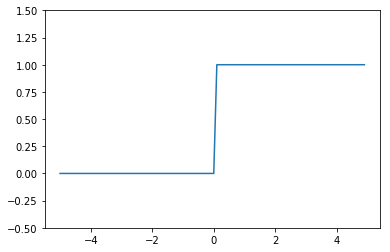

In [14]:
import numpy as np
import matplotlib.pylab as plt

def step_func(x):
    return np.array(x > 0, dtype = np.int)


x = np.arange(-5.0, 5.0, 0.1)
# print(x.shape)

y = step_func(x)

plt.plot(x, y)
plt.ylim(-0.5, 1.5)
plt.show()

위의처럼 계단함수의 그래프는 특정값 이상일 때 1 or 0의 값을 나타내게 된다.


### sigmoid 함수 구현

sigmoid는 계단함수보다 훨씬 더 유연한 형태를 띠고 있다. 

In [2]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

# print(x.shape, y.shape)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


<Figure size 640x480 with 1 Axes>

### 비선형 함수

계단 함수와 sigmoid 두 함수는 **비선형 함수** 이다. 신경망을 구성할 때는 활성화 함수로 비선형 함수를 사용해야 한다. 이는 선형함수를 사용하게 된다면 각 weight 값이 망의 깊이가 깊어짐에 따라 의미가 없어지기 때문이다. 


### ReLU 함수

sigmoid, 계단 함수등을 설명했지만 최근에는 좀 더 다른 함수를 쓴다. *ReLU* 함수는 입력이 0을 넘으면 비례해서 출력을 해주고 0 이하라면 0을 출력해주는 함수이다.


In [3]:
def ReLU(x):
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
ReLU(x)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

위와 같은 형식으로 ReLU 함수를 선언할 수 있다.

- - -

## 다차원 배열의 계산

### 다차원 배열 선언과 계산

1 차원 배열과 2차원 배열을 np.array 함수를 통해서 선언할 수 있다.

In [7]:
dim1_arr = np.array([1, 2, 3])
dim2_arr = np.array([[1, 2, 3], [10, 20, 30]])

print(dim2_arr.shape)

A = np.dot(dim2_arr, dim1_arr)
print(dim2_arr.shape)
print(dim1_arr.shape)

print(A)
print(A.shape)

(2, 3)
(2, 3)
(3,)
[ 14 140]
(2,)


이러한 배열들은 위와 같은 연산들이 가능하다. 그리고 신경망에서도 이러한 행렬의 곱을 사용할 수 있다. 

![Alt text](3_function_pulpan92_image/image2.png)

위와 같은 방식으로 다층 신경망을 구현할 수도 있다.



![Alt text](3_function_pulpan92_image/image3.png)

각 layer마다 bias 값을 더하면서 각 계층의 퍼셉트론에 활성화함수가 적용된 

In [28]:
import numpy as np
import tensorflow as tf

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.array([10, 20])
W1 = np.array([[1, 2, 3, 4], [10, 20, 30, 40]])
b1 = 1

result = np.dot(X, W1)

print(result)
print(result.shape)

X = np.array([[10, 20]])
W1 = np.array([[1, 2, 3, 4], [10, 20, 30, 40]])
b1 = 10

result = np.matmul(X, W1)

print(result)
print(result.shape)

[210 420 630 840]
(4,)
[[210 420 630 840]]
(1, 4)


위는 matmul과 dot을 구분지어서 결과를 낸 것이다. 각각의 결과를 보면 matmul의 경우 행렬의 곱셈을 나타내는 것으로 두 개 전부 data의 값은 같지만 matmul의 경우 하나의 벡터결과로 나타나게 되는것을 알 수 있다.


### 다층 신경망

![Alt text](3_function_pulpan92_image/image4.png)

각 신경망의 weight 및 뉴런들은 위와 같이 도식화가 가능하다. 그리고 행렬의 곱을 이용해서 식을 간소화시킬 수 있다. 각 행렬들은 다음과 같이 나타나게 된다.

![Alt text](3_function_pulpan92_image/image5.png)

이를 numpy 모듈을 사용해서 구현할 수 있다.


In [8]:
import numpy as np
import tensorflow as tf

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# layer1 np.dot process
X = np.array([1, 2])
W1 = np.array([[0.1, 0.2, 0.3], [0.5, 0.6, 0.3]])
b1 = 1

# layer 1 result; np.dot
L1 = np.dot(X, W1) + b1
print('[] L1 shape: ', L1.shape)

# layer 2 np.dot process
W2 = np.array([[0.1], [0.2], [0.3]])
b2 = 0.1

print(sigmoid(L1))

# np.matmul process
X = np.array([[1, 2]])
W1 = np.array([[0.1, 0.2, 0.3], [0.5, 0.6, 0.3]])
b1 = 1

# layer 1 result; np.matmul
L1 = np.matmul(X, W1) + b1

print('[] np.matmul: ', L1)
print('[] np.matmul shape: ', L1.shape)

print(sigmoid(L1))

[] L1 shape:  (3,)
[0.89090318 0.9168273  0.86989153]
[] np.matmul:  [[2.1 2.4 1.9]]
[] np.matmul shape:  (1, 3)
[[0.89090318 0.9168273  0.86989153]]


layer1을 np.dot, np.matmul을 이용해서 구현한 상태이다. 각 결과를 보면 데이터는 같지만 shape가 다르게 나오는 것을 알 수 있다. 그리고 활성화 함수를 은닉층의 뉴런에 배치해 실제 딥러닝 프레임워크의 layer 1을 표현하였다. 

![Alt text](3_function_pulpan92_image/image6.png)

code는 입력층 부분에서 layer1으로 넘어가는 부분을 표현하였기에 이 후 행렬 값만 제대로 맞춰서 여러 layer를 가진 딥 러닝 구조를 만들 수 있다. 


In [35]:
import numpy as np
import tensorflow as tf

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def check(x):
    print('[] shape: ', x.shape)

# np.dot network init
def dot_net_init():
    net = {}
    net['W1'] = np.array([[0.3, 0.1], [0.6, 0.1], [0.5, 0.2]])
    net['b1'] = np.array([1, 1])
    net['W2'] = np.array([[0.1, 0.1, 0.5], [0.8, 0.3, 0.2]])
    net['b2'] = np.array([0.1, 0.4, 0.5])
    net['W3'] = np.array([[0.3], [0.1], [0.4]])
    net['b3'] = np.array([0.5])
    return net

def dot_process(X, net):
    L1 = np.dot(X, net['W1']) + net['b1']
    temp = sigmoid(L1)
    L2 = np.dot(temp, net['W2']) + net['b2']
    temp = sigmoid(L2)
    L3 = np.dot(temp, net['W3']) + net['b3']
    
    return sigmoid(L3)
    
def matmul_process(X, net):
    # for matrix operation
    X = np.array([X])
    
    L1 = np.dot(X, net['W1']) + net['b1']
    temp = sigmoid(L1)
    L2 = np.dot(temp, net['W2']) + net['b2']
    temp = sigmoid(L2)
    L3 = np.dot(temp, net['W3']) + net['b3']
    
    return sigmoid(L3)

def main():
    # input matrix: (3,); np. dot process
    X = np.array([1, 1, 1])
    
    # init neural network
    net = dot_net_init()
    
    # np.dot process start
    result = dot_process(X, net)
    print('[] dot process result: ', result)
    print('[] dot result shape: ', result.shape)
    
    # np.matmul process start
    result = matmul_process(X, net)
    print('[] matmul process result: ', result)
    print('[] matmul result shape: ', result.shape)
    
if __name__ == '__main__':
    main()
    

[] dot process result:  [0.74614674]
[] dot result shape:  (1,)
[] matmul process result:  [[0.74614674]]
[] matmul result shape:  (1, 1)


위에서는 np.dot, np.matmul을 이용해서 3개의 layer로 이뤄진 딥 러닝을 구성해보았다

**L1: 2
L2: 3
L3: 1**

위와 같이 각 뉴럴이 구성되어 있으며 행은 input의 개수, 열은 output의 개수로 맞춰주면 되는 것을 알 수 있다. 그리고 각 계층 별로 result 값이 나오면 활성화함수 (*sigmoid, ReLU*) 를 사용해서 값을 재정비하고 그 이후 그 값을 다음 layer에 넣어줘야 한다.

- - -


## 출력층 설계

기계 학습 문제에서는 결과를 **분류**, **회귀** 로 나누게 된다. **분류**는 데이터가 어느 class에 소속하느냐를 구분하는 문제이고 **회귀**는 입력데이터에서 연속적인 수치를 예측하는 문제이다.


### Softmax 함수

![Alt text](3_function_pulpan92_image/image7.png)

softmax  함수는 식은 분류에서 사용한다. n은 *출력층의 뉴런 수* yk는 그 중 *k번 째 출력* 임을 뜻한다. softmax 함수를 쓰는 이유는 결과를 확률 값으로 해석하려 하기 위함이다. 

이는 각 뉴런들의 활성화 함수와는 달리 최종 출력계층에서 작용하여 각 결과를 확률로 보내는데 사용된다.

In [41]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x)
    print(exp_x)
    s = np.sum(exp_x, 0)
    
    y = exp_x / s
    
    return y

test = np.array([1, 2, 3])
print(softmax(test))



[ 2.71828183  7.3890561  20.08553692]
[0.09003057 0.24472847 0.66524096]


위의 softmax는 구현이 잘 되지만 기본적으로 사용되는 exp 함수는 지수함수로 나타나기 때문에 작은 값에도 결과값은 아주 큰 값이 나올 수 있다. 그렇다면 NaN이라는 결과가 나오게 된다.

In [45]:
X = np.array([1000, 1001, 2000])

softmax(X)

[inf inf inf]


C:\Users\pulpan92\Anaconda3\envs\machine\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\pulpan92\Anaconda3\envs\machine\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

이를 방지하려면 input으로 들어가는 행렬 중 가장 큰 원소를 뺀 후 그 값을 softmax에 넣으면 된다. 

In [61]:
import numpy as np

def softmax(X):
    maxnum = np.max(X)
    print(X - maxnum)
    exp_x = np.exp(X - maxnum)
    print(exp_x)
    s = np.sum(exp_x, 0)
    
    y = exp_x / s
    
    return y


X = np.array([1010, 1000, 990])

print(softmax(X))

[  0 -10 -20]
[1.00000000e+00 4.53999298e-05 2.06115362e-09]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


softmax 함수의 가장 큰 특징은 모든 확률의 값이 1인 것이다. 따라서 출력층에서 softmax를 거쳐 나온 결과물들을 확률로 해석할 수 있다. 

- - -

## 손글씨 인식

### MNIST dataset

손글씨 숫자 이미지 집합을 나타낸 것이다. 이는 총 train image 60000장, test image 10000장이 있고 각각의 label이 따로 있다. 

In [90]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
batch = mnist.train.next_batch(100)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


위는 tensorflow module에서 train의 각 100개의 image와 label을 갖고오게 된다. batch[0]은 image, batch[1]은 label 데이터들이 담겨져 있다. 

In [6]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

def get_data():
    mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
    batch = mnist.train.next_batch(10000)
    
    return batch


def init_net():
    net = {}
    net['W1'] = np.array

def main():
    mnist = get_data()
    print(mnist[0][1].shape)


if __name__ == '__main__':
    main()


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
(784,)
